<a href="https://colab.research.google.com/github/Landry-gtb/Landry-gtb/blob/main/django_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montage de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Vérification que le fichier est accessible
import os
file_path = "/content/drive/MyDrive/Colab_DjangoIA_Project/allocine_train.csv"

if os.path.exists(file_path):
    print("✅ Fichier trouvé:", file_path)
    # Afficher les premières lignes pour vérifier
    import pandas as pd
    df_preview = pd.read_csv(file_path, nrows=3)
    print("\n📋 Aperçu du fichier:")
    print(df_preview)
    print(f"\n📊 Colonnes disponibles: {list(df_preview.columns)}")
else:
    print("❌ Fichier non trouvé. Vérifiez le chemin.")
    print("📁 Contenu du dossier:")
    try:
        print(os.listdir("/content/drive/MyDrive/Colab_DjangoIA_Project/"))
    except:
        print("Le dossier n'existe pas encore.")

Mounted at /content/drive
✅ Fichier trouvé: /content/drive/MyDrive/Colab_DjangoIA_Project/allocine_train.csv

📋 Aperçu du fichier:
                                              review  label
0  Si vous cherchez du cinéma abrutissant à tous ...      0
1  Trash, re-trash et re-re-trash...! Une horreur...      0
2  Et si, dans les 5 premières minutes du film, l...      0

📊 Colonnes disponibles: ['review', 'label']


In [ ]:
# Installation des dépendances
!pip install transformers torch torchvision torchaudio
!pip install datasets
!pip install scikit-learn pandas numpy matplotlib seaborn
!pip install accelerate

# Vérification du GPU
import torch
print(f"🚀 CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🎯 GPU: {torch.cuda.get_device_name()}")
    print(f"💾 Mémoire GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("⚠️ Utilisation du CPU (plus lent)")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

=== EXPLORATION DU DATASET ===
Forme du dataset: (160000, 2)
Colonnes: ['review', 'label']

Premières lignes:
                                              review  label
0  Si vous cherchez du cinéma abrutissant à tous ...      0
1  Trash, re-trash et re-re-trash...! Une horreur...      0
2  Et si, dans les 5 premières minutes du film, l...      0
3  Mon dieu ! Quelle métaphore filée ! Je suis ab...      0
4  Premier film de la saga Kozure Okami, "Le Sabr...      1

=== DISTRIBUTION DES SENTIMENTS ===
label
1    80587
0    79413
Name: count, dtype: int64


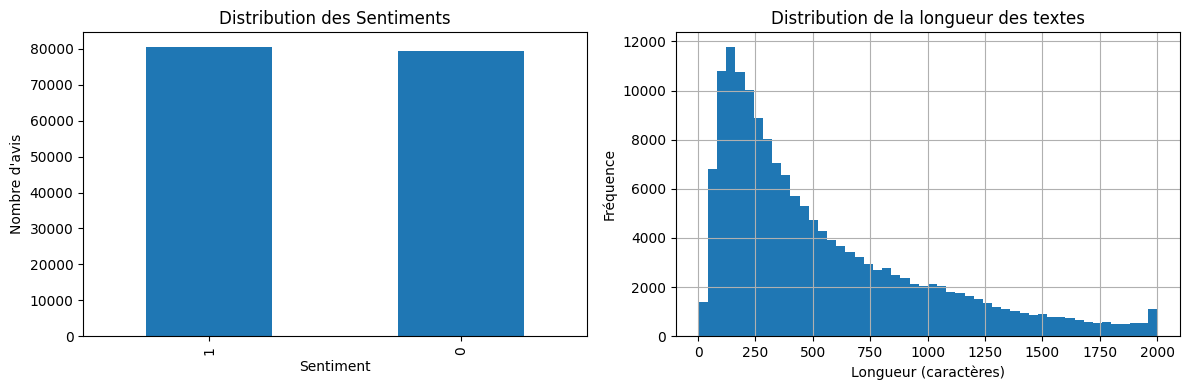


=== STATISTIQUES DES TEXTES ===
Longueur moyenne: 542.5 caractères
Longueur médiane: 389.0 caractères
Longueur max: 2000 caractères
Longueur min: 3 caractères


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Chargement du dataset (upload du fichier allocine_train.csv dans Colab)
df = pd.read_csv('/content/drive/MyDrive/Colab_DjangoIA_Project/allocine_train.csv')

# Exploration des données
print("=== EXPLORATION DU DATASET ===")
print(f"Forme du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")
print("\nPremières lignes:")
print(df.head())

# Vérification de la distribution des sentiments
print("\n=== DISTRIBUTION DES SENTIMENTS ===")
print(df['label'].value_counts())

# Visualisation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'avis')

plt.subplot(1, 2, 2)
df['review'].str.len().hist(bins=50)
plt.title('Distribution de la longueur des textes')
plt.xlabel('Longueur (caractères)')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Statistiques des textes
print(f"\n=== STATISTIQUES DES TEXTES ===")
print(f"Longueur moyenne: {df['review'].str.len().mean():.1f} caractères")
print(f"Longueur médiane: {df['review'].str.len().median():.1f} caractères")
print(f"Longueur max: {df['review'].str.len().max()} caractères")
print(f"Longueur min: {df['review'].str.len().min()} caractères")

In [ ]:
# Pre-processing
import re
from transformers import AutoTokenizer
import pandas as pd # Import pandas here as well

class FrenchTextPreprocessor:
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained('camembert-base')

    def clean_text(self, text):
        """Nettoyage basique du texte français"""
        if pd.isna(text):
            return ""

        # Conversion en string si nécessaire
        text = str(text)

        # Suppression des balises HTML
        text = re.sub(r'<[^>]+>', '', text)

        # Remplacement des caractères spéciaux par des espaces
        text = re.sub(r'[^\w\s\'.àâäéèêëïîôöùûüÿç-]', ' ', text, flags=re.IGNORECASE)

        # Suppression des espaces multiples
        text = re.sub(r'\s+', ' ', text)

        # Strip et lowercase
        text = text.strip().lower()

        return text

    def prepare_data(self, df, text_col='review', label_col='label', max_length=512):
        """Préparation complète des données"""
        df_clean = df.copy()

        # Nettoyage
        print("Nettoyage des textes...")
        df_clean['text_clean'] = df_clean[text_col].apply(self.clean_text)

        # Suppression des textes vides
        df_clean = df_clean[df_clean['text_clean'].str.len() > 10]

        # Encodage des labels (négatif: 0, positif: 1)
        label_mapping = {'neg': 0, 'pos': 1, 'negative': 0, 'positive': 1, 0: 0, 1: 1}
        df_clean['label'] = df_clean[label_col].map(label_mapping)

        # Suppression des labels non mappés
        df_clean = df_clean.dropna(subset=['label'])
        df_clean['label'] = df_clean['label'].astype(int)

        print(f"Données après nettoyage: {len(df_clean)} exemples")
        print(f"Distribution des labels: {df_clean['label'].value_counts().to_dict()}")

        return df_clean[['text_clean', 'label']]

# Préparation des données
preprocessor = FrenchTextPreprocessor()
df_clean = preprocessor.prepare_data(df)

# Division train/validation/test
train_df, temp_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"\n=== DIVISION DES DONNÉES ===")
print(f"Train: {len(train_df)} exemples")
print(f"Validation: {len(val_df)} exemples")
print(f"Test: {len(test_df)} exemples")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

Nettoyage des textes...
Données après nettoyage: 159798 exemples
Distribution des labels: {1: 80485, 0: 79313}

=== DIVISION DES DONNÉES ===
Train: 111858 exemples
Validation: 23970 exemples
Test: 23970 exemples


In [ ]:
# Configuration du modèle
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from datasets import Dataset
import torch
from torch.utils.data import DataLoader

# Code from Cell 3 to ensure dataframes are defined
class FrenchTextPreprocessor:
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained('camembert-base')

    def clean_text(self, text):
        """Nettoyage basique du texte français"""
        if pd.isna(text):
            return ""

        # Conversion en string si nécessaire
        text = str(text)

        # Supprimer les balises HTML
        text = re.sub(r'<[^>]+>', '', text)

        # Remplacer les caractères spéciaux par des espaces
        text = re.sub(r'[^\w\s\'.àâäéèêëïîôöùûüÿç-]', ' ', text, flags=re.IGNORECASE)

        # Supprimer les espaces multiples
        text = re.sub(r'\s+', ' ', text)

        # Strip et lowercase
        text = text.strip().lower()

        return text

    def prepare_data(self, df, text_col='review', label_col='label', max_length=512):
        """Préparation complète des données"""
        df_clean = df.copy()

        # Nettoyage
        print("Nettoyage des textes...")
        df_clean['text_clean'] = df_clean[text_col].apply(self.clean_text)

        # Supprimer les textes vides
        df_clean = df_clean[df_clean['text_clean'].str.len() > 10]

        # Encoder les labels (négatif: 0, positif: 1)
        label_mapping = {'neg': 0, 'pos': 1, 'negative': 0, 'positive': 1, 0: 0, 1: 1}
        df_clean['label'] = df_clean[label_col].map(label_mapping)

        # Supprimer les labels non mappés
        df_clean = df_clean.dropna(subset=['label'])
        df_clean['label'] = df_clean['label'].astype(int)

        print(f"Données après nettoyage: {len(df_clean)} exemples")
        print(f"Distribution des labels: {df_clean['label'].value_counts().to_dict()}")

        return df_clean[['text_clean', 'label']]

# Chargement du dataset (upload du fichier allocine_train.csv dans Colab)
file_path = "/content/drive/MyDrive/Colab_DjangoIA_Project/allocine_train.csv"
df = pd.read_csv(file_path)

# Préparation des données
preprocessor = FrenchTextPreprocessor()
df_clean = preprocessor.prepare_data(df)

# Division train/validation/test
train_df, temp_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])


class CamemBERTSentimentModel:
    def __init__(self, model_name='camembert-base', num_labels=2):
        self.model_name = model_name
        self.num_labels = num_labels
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels
        )
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)

    def tokenize_data(self, df, max_length=512):
        """Tokenisation des données"""
        def tokenize_function(examples):
            return self.tokenizer(
                examples['text_clean'],
                truncation=True,
                padding=True,
                max_length=max_length,
                return_tensors="pt"
            )

        # Convertir en Dataset Hugging Face
        dataset = Dataset.from_pandas(df)
        tokenized_dataset = dataset.map(
            tokenize_function,
            batched=True,
            remove_columns=['text_clean']
        )

        # Renommer la colonne label en labels pour Trainer
        tokenized_dataset = tokenized_dataset.rename_column('label', 'labels')

        return tokenized_dataset

    def prepare_datasets(self, train_df, val_df, test_df):
        """Préparation de tous les datasets"""
        print("Tokenisation des données...")

        self.train_dataset = self.tokenize_data(train_df)
        self.val_dataset = self.tokenize_data(val_df)
        self.test_dataset = self.tokenize_data(test_df)

        print(f"Train dataset: {len(self.train_dataset)} exemples")
        print(f"Val dataset: {len(self.val_dataset)} exemples")
        print(f"Test dataset: {len(self.test_dataset)} exemples")

    def compute_metrics(self, eval_pred):
        """Métriques pour l'évaluation"""
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)

        accuracy = accuracy_score(labels, predictions)

        return {
            'accuracy': accuracy,
        }

# Initialisation du modèle
print("=== INITIALISATION DU MODÈLE CAMEMBERT ===")
sentiment_model = CamemBERTSentimentModel()

# Préparation des datasets
sentiment_model.prepare_datasets(train_df, val_df, test_df)


Nettoyage des textes...
Données après nettoyage: 159798 exemples
Distribution des labels: {1: 80485, 0: 79313}
=== INITIALISATION DU MODÈLE CAMEMBERT ===


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenisation des données...


Map:   0%|          | 0/111858 [00:00<?, ? examples/s]

Map:   0%|          | 0/23970 [00:00<?, ? examples/s]

Map:   0%|          | 0/23970 [00:00<?, ? examples/s]

Train dataset: 111858 exemples
Val dataset: 23970 exemples
Test dataset: 23970 exemples


In [ ]:
# Désactivation de WANDB
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# Configuration et entraînement avec checkpoints
import os
import glob
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding

# Chemins de sauvegarde sur Google Drive
CHECKPOINT_DIR = '/content/drive/MyDrive/camembert-checkpoints'
FINAL_MODEL_DIR = '/content/drive/MyDrive/camembert-sentiment-final'

# Créer les dossiers si nécessaires
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(FINAL_MODEL_DIR, exist_ok=True)

def find_latest_checkpoint():
    """Trouve le dernier checkpoint disponible"""
    checkpoints = glob.glob(f"{CHECKPOINT_DIR}/checkpoint-*")
    if checkpoints:
        latest = max(checkpoints, key=lambda x: int(x.split('-')[-1]))
        print(f"✅ Checkpoint trouvé : {latest}")
        return latest
    print("ℹ️ Aucun checkpoint trouvé, démarrage from scratch")
    return None

# Configuration d'entraînement optimisée
training_args = TrainingArguments(
    output_dir=CHECKPOINT_DIR,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=f'{CHECKPOINT_DIR}/logs',
    logging_steps=50,                    # Log plus fréquent
    eval_strategy="steps",               # Évaluation par steps
    eval_steps=200,                      # Évaluer tous les 200 steps
    save_strategy="steps",               # Sauvegarde par steps
    save_steps=200,                      # Sauvegarder tous les 200 steps
    save_total_limit=3,                  # Garder 3 derniers checkpoints
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    report_to=None,
    dataloader_pin_memory=False,         # Évite les problèmes de mémoire
    resume_from_checkpoint=True,         # Active la reprise automatique
)

# Collator et Trainer
data_collator = DataCollatorWithPadding(tokenizer=sentiment_model.tokenizer)

trainer = Trainer(
    model=sentiment_model.model,
    args=training_args,
    train_dataset=sentiment_model.train_dataset,
    eval_dataset=sentiment_model.val_dataset,
    tokenizer=sentiment_model.tokenizer,
    data_collator=data_collator,
    compute_metrics=sentiment_model.compute_metrics,
)

# ENTRAÎNEMENT avec reprise automatique
print("=== DÉBUT DE L'ENTRAÎNEMENT ===")

# Vérifier s'il y a un checkpoint à reprendre
resume_checkpoint = find_latest_checkpoint()

try:
    if resume_checkpoint:
        print(f"🔄 Reprise de l'entraînement depuis : {resume_checkpoint}")
        trainer.train(resume_from_checkpoint=resume_checkpoint)
    else:
        print("🚀 Démarrage nouvel entraînement...")
        trainer.train()

    print("✅ ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS")

    # Sauvegarde finale
    trainer.save_model(FINAL_MODEL_DIR)
    sentiment_model.tokenizer.save_pretrained(FINAL_MODEL_DIR)
    print(f"💾 Modèle final sauvegardé : {FINAL_MODEL_DIR}")

except KeyboardInterrupt:
    print("⚠️ Entraînement interrompu par l'utilisateur")
    print(f"💾 Checkpoints disponibles dans : {CHECKPOINT_DIR}")
except Exception as e:
    print(f"❌ Erreur pendant l'entraînement : {e}")
    print(f"💾 Checkpoints disponibles dans : {CHECKPOINT_DIR}")

# Afficher les checkpoints disponibles
checkpoints = glob.glob(f"{CHECKPOINT_DIR}/checkpoint-*")
if checkpoints:
    print(f"\n📁 {len(checkpoints)} checkpoint(s) disponible(s) :")
    for cp in sorted(checkpoints):
        print(f"   - {cp}")

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


=== DÉBUT DE L'ENTRAÎNEMENT ===
✅ Checkpoint trouvé : /content/drive/MyDrive/camembert-checkpoints/checkpoint-2400
🔄 Reprise de l'entraînement depuis : /content/drive/MyDrive/camembert-checkpoints/checkpoint-2400


You are resuming training from a checkpoint trained with 4.55.1 of Transformers but your current version is 4.55.2. This is not recommended and could yield to errors or unwanted behaviors.


Step,Training Loss,Validation Loss,Accuracy
2600,0.122100,0.123846,0.959408
2800,0.164500,0.146594,0.960784
3000,0.170800,0.169837,0.952315
3200,0.189400,0.148724,0.954819
3400,0.147400,0.153352,0.956612
3600,0.118200,0.199024,0.951815
3800,0.156400,0.133486,0.951606
4000,0.147300,0.143153,0.959950
4200,0.139100,0.136767,0.958615
4400,0.124600,0.167151,0.955444


Step,Training Loss,Validation Loss,Accuracy
2600,0.122100,0.123846,0.959408
2800,0.164500,0.146594,0.960784
3000,0.170800,0.169837,0.952315
3200,0.189400,0.148724,0.954819
3400,0.147400,0.153352,0.956612
3600,0.118200,0.199024,0.951815
3800,0.156400,0.133486,0.951606
4000,0.147300,0.143153,0.959950
4200,0.139100,0.136767,0.958615
4400,0.124600,0.167151,0.955444


✅ ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS
💾 Modèle final sauvegardé : /content/drive/MyDrive/camembert-sentiment-final

📁 3 checkpoint(s) disponible(s) :
   - /content/drive/MyDrive/camembert-checkpoints/checkpoint-20200
   - /content/drive/MyDrive/camembert-checkpoints/checkpoint-20800
   - /content/drive/MyDrive/camembert-checkpoints/checkpoint-20976


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ===================================================================
# INTEGRATION ET LANCEMENT AVEC DJANGO
# ===================================================================

# --- 1. Installation ---
print("🚀 1/8 : Installation des dépendances...")
!pip install -q django djangorestframework pyngrok

# --- 2. Création de l'architecture du projet ---
print("🚀 2/8 : Création de la structure du projet Django...")
import os
%cd /content/
!rm -rf feedback_project
!django-admin startproject feedback_project
%cd feedback_project
!python manage.py startapp api
!mkdir -p api/templates/registration

# --- 3. Vérification du chemin du modèle ---
print("🚀 3/8 : Vérification de l'accès au modèle IA...")
model_path = "/content/drive/MyDrive/Colab_IA_Project/sentiment_model_allocine"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"ERREUR CRITIQUE : Le dossier du modèle est introuvable à l'adresse '{model_path}'.")
print("✅ Le dossier du modèle est accessible.")

# --- 4. Écriture des fichiers de l'application ---
print("🚀 4/8 : Écriture du code de l'application...")
# (Le code des fichiers est identique à la v4 et est recréé ici pour être complet)
with open("api/models.py", "w") as f: f.write("""from django.db import models
class Feedback(models.Model):
    text=models.TextField(); predicted_sentiment=models.CharField(max_length=10); score=models.FloatField(); created_at=models.DateTimeField(auto_now_add=True)""")
with open("api/views.py", "w") as f: f.write(f"""from django.shortcuts import render; from django.contrib.auth.decorators import login_required; from django.utils import timezone; from datetime import timedelta; from rest_framework.views import APIView; from rest_framework.response import Response; from rest_framework import status; from transformers import pipeline; from .models import Feedback; import os
def home(request): return render(request, 'index.html')
@login_required
def dashboard(request):
    feedbacks=Feedback.objects.filter(created_at__gte=timezone.now()-timedelta(days=7)); p_count=feedbacks.filter(predicted_sentiment='Positif').count(); n_count=feedbacks.filter(predicted_sentiment='Négatif').count(); total=p_count+n_count
    context={{'positive_count':p_count, 'negative_count':n_count, 'positive_percentage':(p_count/total*100) if total>0 else 0, 'negative_percentage':(n_count/total*100) if total>0 else 0, 'recent_feedbacks':Feedback.objects.order_by('-created_at')[:10]}}
    return render(request, 'dashboard.html', context)
model_path="{model_path}"
try:
    print("Chargement du modèle..."); sentiment_analyzer=pipeline("sentiment-analysis",model=model_path,tokenizer=model_path,device=-1); print("✅ Modèle chargé."); MODEL_LOADED=True
except Exception as e:
    print(f"❌ ERREUR MODÈLE: {{e}}"); MODEL_LOADED=False
class SentimentAnalysisView(APIView):
    def post(self,request,*args,**kwargs):
        if not MODEL_LOADED: return Response({{"error":"Modèle IA non opérationnel."}},status=500)
        text=request.data.get('text');
        if not text: return Response({{"error":"Champ 'text' requis."}},status=400)
        try:
            result=sentiment_analyzer(text)[0]; sentiment="Positif" if result['label']=='LABEL_1' else "Négatif"
            Feedback.objects.create(text=text,predicted_sentiment=sentiment,score=result['score'])
            return Response({{"sentiment":sentiment,"score":result['score']}},status=200)
        except Exception: return Response({{"error":"Erreur lors de l'analyse."}},status=500)""")
!echo "from django.urls import path; from .views import home, dashboard, SentimentAnalysisView; urlpatterns = [path('', home, name='home'), path('dashboard/', dashboard, name='dashboard'), path('api/analyze/', SentimentAnalysisView.as_view(), name='api-analyze')]" > api/urls.py
with open("api/templates/index.html", "w") as f: f.write("""<!DOCTYPE html><html lang="fr"><head><meta charset="UTF-8"><title>Analyse de Sentiments</title><style>body{font-family:sans-serif;background-color:#f5f5f5;display:flex;justify-content:center;align-items:center;height:100vh;margin:0}.container{background:white;padding:2rem;border-radius:8px;box-shadow:0 4px 12px rgba(0,0,0,0.1);text-align:center;max-width:500px;width:90%}nav a{margin:0 10px;text-decoration:none;color:#007bff}textarea{width:95%;padding:.8rem;border-radius:4px;border:1px solid #ccc;font-size:1rem;margin-top:1rem}button{background-color:#007bff;color:white;padding:.8rem 1.5rem;border:none;border-radius:4px;font-size:1rem;cursor:pointer;margin-top:1rem}#result{margin-top:1.5rem;font-size:1.2rem;min-height:50px;padding:1rem;border-radius:4px}.positif{background-color:#e0ffe0;color:#006400}.negatif{background-color:#ffe0e0;color:#a00000}</style></head><body><div class="container"><nav><a href="/">Analyse</a> | <a href="/dashboard">Tableau de Bord</a></nav><h1>Analyse de Feedback</h1><textarea id="feedbackText" rows="4"></textarea><button onclick="analyze()">Envoyer</button><div id="result"></div></div><script>async function analyze(){const t=document.getElementById("feedbackText"),e=document.getElementById("result");if(!t.value.trim())return void(e.textContent="Veuillez entrer un texte.");e.textContent="Analyse en cours...";try{const n=await fetch("/api/analyze/",{method:"POST",headers:{"Content-Type":"application/json"},body:JSON.stringify({text:t.value})}),s=await n.json();n.ok?(e.innerHTML=`Sentiment: ${s.sentiment} (Score: ${(100*s.score).toFixed(2)}%)<br><p style='font-size:1rem;margin-top:10px;'>Merci pour votre retour !</p>`,e.className="",e.classList.add(s.sentiment==="Positif"?"positif":"negatif"),t.value=""):(e.textContent=`Erreur: ${s.error}`,e.className="negatif")}catch(t){e.textContent="Erreur de connexion.",e.className="negatif"}}</script></body></html>""")
with open("api/templates/dashboard.html", "w") as f: f.write("""<!DOCTYPE html><html lang="fr"><head><meta charset="UTF-8"><title>Tableau de Bord</title><script src="https://cdn.jsdelivr.net/npm/chart.js"></script><style>body{font-family:sans-serif;background-color:#f5f5f5;color:#333;margin:0;padding:2rem}.container{background:white;padding:2rem;border-radius:8px;box-shadow:0 4px 12px rgba(0,0,0,0.1);max-width:900px;margin:auto}nav a{margin:0 10px;text-decoration:none;color:#007bff}h1,h2{text-align:center}.stats{display:flex;justify-content:space-around;margin:2rem 0}.stat-box{text-align:center}table{width:100%;border-collapse:collapse;margin-top:2rem}th,td{border:1px solid #ddd;padding:8px;text-align:left}th{background-color:#f2f2f2}</style></head><body><div class="container"><nav><a href="/">Analyse</a> | <a href="/dashboard">Tableau de Bord</a></nav><h1>Tableau de Bord</h1><div class="stats"><div class="stat-box"><h2>Positifs</h2><p style="color:green;font-size:2rem">{{ positive_count }} ({{ positive_percentage }}%)</p></div><div class="stat-box"><h2>Négatifs</h2><p style="color:red;font-size:2rem">{{ negative_count }} ({{ negative_percentage }}%)</p></div></div><div style="width:75%;margin:auto;"><canvas id="sentimentChart"></canvas></div><h2>Derniers Avis Analysés</h2><table><tr><th>Avis</th><th>Prédiction</th><th>Score</th></tr>{% for fb in recent_feedbacks %}<tr><td>{{ fb.text|slice:":80" }}...</td><td>{{ fb.predicted_sentiment }}</td><td>{{ fb.score|floatformat:4 }}</td></tr>{% endfor %}</table></div><script>const ctx=document.getElementById("sentimentChart");new Chart(ctx,{type:"doughnut",data:{labels:["Positifs","Négatifs"],datasets:[{label:"Sentiments",data:[{{positive_count}},{{negative_count}}],backgroundColor:["#28a745","#dc3545"]}]}});</script></body></html>""")
with open("api/templates/registration/login.html", "w") as f: f.write("""<!DOCTYPE html><html lang="fr"><head><meta charset="UTF-8"><title>Connexion</title><style>body{font-family:sans-serif;background-color:#f5f5f5;display:flex;justify-content:center;align-items:center;height:100vh;margin:0}.login-container{background:white;padding:2rem 3rem;border-radius:8px;box-shadow:0 4px 12px rgba(0,0,0,0.1);text-align:center;width:300px}h2{margin-bottom:1.5rem}form p{text-align:left;margin:0;padding:0}input{width:90%;padding:10px;margin-top:5px;margin-bottom:1rem;border:1px solid #ccc;border-radius:4px}button{width:100%;padding:10px;background-color:#007bff;color:white;border:none;border-radius:4px;cursor:pointer}.errorlist{color:red;list-style:none;padding:0;font-size:0.9rem;text-align:center}</style></head><body><div class="login-container"><h2>Connexion Administrateur</h2>{% if form.errors %}<p style="color:red;">Nom d'utilisateur ou mot de passe incorrect.</p>{% endif %}<form method="post" action="{% url 'login' %}">{% csrf_token %}{{ form.as_p }}<button type="submit">Se connecter</button></form></div></body></html>""")
!echo "from django.contrib import admin; from django.urls import path, include; urlpatterns = [path('admin/', admin.site.urls), path('accounts/', include('django.contrib.auth.urls')), path('', include('api.urls'))]" > feedback_project/urls.py

# --- 5. Lancement de ngrok et configuration de la sécurité ---
print("🚀 5/8 : Lancement de ngrok et configuration de la sécurité...")
from pyngrok import ngrok
ngrok.kill()
public_url = ngrok.connect(8000).public_url
trusted_origin = public_url.replace("https://", "")
print(f"✅ ngrok en ligne. Origine de confiance configurée : {trusted_origin}")

# --- CORRECTION DE SYNTAXE APPLIQUÉE CI-DESSOUS ---
settings_content = f"""
from pathlib import Path
import os
BASE_DIR = Path(__file__).resolve().parent.parent
SECRET_KEY = 'secret'
DEBUG = True
ALLOWED_HOSTS = ['*']
CSRF_TRUSTED_ORIGINS = ['https://{trusted_origin}']
INSTALLED_APPS = ['django.contrib.admin', 'django.contrib.auth', 'django.contrib.contenttypes', 'django.contrib.sessions', 'django.contrib.messages', 'django.contrib.staticfiles', 'rest_framework', 'api']
MIDDLEWARE = ['django.middleware.security.SecurityMiddleware', 'django.contrib.sessions.middleware.SessionMiddleware', 'django.middleware.common.CommonMiddleware', 'django.middleware.csrf.CsrfViewMiddleware', 'django.contrib.auth.middleware.AuthenticationMiddleware', 'django.contrib.messages.middleware.MessageMiddleware', 'django.middleware.clickjacking.XFrameOptionsMiddleware']
ROOT_URLCONF = 'feedback_project.urls'
TEMPLATES = [{{
    'BACKEND': 'django.template.backends.django.DjangoTemplates',
    'DIRS': [os.path.join(BASE_DIR, 'api', 'templates')],
    'APP_DIRS': True,
    'OPTIONS': {{
        'context_processors': [
            'django.template.context_processors.debug',
            'django.template.context_processors.request',
            'django.contrib.auth.context_processors.auth',
            'django.contrib.messages.context_processors.messages',
        ],
    }},
}}]
WSGI_APPLICATION = 'feedback_project.wsgi.application'
DATABASES = {{
    'default': {{
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }}
}}
LANGUAGE_CODE = 'fr-fr'
TIME_ZONE = 'UTC'
USE_I18N = True
USE_TZ = True
STATIC_URL = 'static/'
DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'
LOGIN_URL = '/accounts/login/'
LOGIN_REDIRECT_URL = '/dashboard'
LOGOUT_REDIRECT_URL = '/'
"""
with open("feedback_project/settings.py", "w") as f:
    f.write(settings_content.replace("{{", "{").replace("}}", "}"))


# --- 6. Préparation de la base de données ---
print("🚀 6/8 : Création et application des migrations...")
!python manage.py makemigrations api
!python manage.py migrate

# --- 7. Création de l'administrateur ---
print("🚀 7/8 : Création du compte administrateur (admin / admin1234)...")
!echo "from django.contrib.auth import get_user_model; User = get_user_model(); User.objects.filter(username='admin').exists() or User.objects.create_superuser('admin', 'admin@example.com', 'admin1234')" | python manage.py shell

# --- 8. Lancement du serveur ---
print(f"\n\n✅ APPLICATION FINALE EN LIGNE : {public_url}\n")
!python manage.py runserver 8000

🚀 1/8 : Installation des dépendances...
🚀 2/8 : Création de la structure du projet Django...
/content
/content/feedback_project
🚀 3/8 : Vérification de l'accès au modèle IA...
✅ Le dossier du modèle est accessible.
🚀 4/8 : Écriture du code de l'application...
🚀 5/8 : Lancement de ngrok et configuration de la sécurité...
✅ ngrok en ligne. Origine de confiance configurée : d76bc9b9da4b.ngrok-free.app
🚀 6/8 : Création et application des migrations...
2025-08-23 20:55:54.944522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755982555.006860   70084 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755982555.029431   70084 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already b

In [ ]:
!python manage.py changepassword admin

Changing password for user 'admin'
Password: Traceback (most recent call last):
  File "/content/feedback_project/manage.py", line 22, in <module>
    main()
  File "/content/feedback_project/manage.py", line 18, in main
    execute_from_command_line(sys.argv)
  File "/usr/local/lib/python3.12/dist-packages/django/core/management/__init__.py", line 442, in execute_from_command_line
    utility.execute()
  File "/usr/local/lib/python3.12/dist-packages/django/core/management/__init__.py", line 436, in execute
    self.fetch_command(subcommand).run_from_argv(self.argv)
  File "/usr/local/lib/python3.12/dist-packages/django/core/management/base.py", line 416, in run_from_argv
    self.execute(*args, **cmd_options)
  File "/usr/local/lib/python3.12/dist-packages/django/core/management/base.py", line 460, in execute
    output = self.handle(*args, **options)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/django/contrib/auth/management/commands/chan